<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Japan_case_study_Milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Japan's COVID-19 Response Case Study**

## 📊 Exploratory Data Analysis (EDA): Japan
This section explores trends in cases, deaths, and policy measures from the OxCGRT dataset.

## <font color='crimson'>**Milestone #1 - Project Kick-off, Data Exploration, and Cleaning**</font>

GOAL: The main goal of this milestone is to set up your environment, install the required packages, load the data and do some basic exploratory data analysis.

### **Environment Setup**

In [35]:
# Loading libraries
import pandas as pd                       # for data manipulation and analysis
import matplotlib.pyplot as plt           # for 2D plotting
from matplotlib.dates import DateFormatter
import seaborn as sns                     # for statistical data visualization
sns.set(style='whitegrid')                # Set visual style for seaborn
import plotly.express as px               # for interactive data visualization

import folium                             # for data visualization on an interactive leaflet map
import geopandas as gpd

import warnings
warnings.simplefilter("ignore")

In [36]:
# Getting started
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Data Preparation**

In [37]:
# Read the data
df_global = pd.read_csv("/content/drive/MyDrive/Analyzing_Pandemic_Responses/data/OxCGRT_compact_national_v1.csv")
df_global.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


### **Initial Data Exploration**

In [38]:
# Inspecting the data
df_global.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 

In [39]:
# Summary Statistics
global_stats = df_global.describe()
global_stats

,RegionName,RegionCode,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,...,V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,0.0,0.0,2.027600e+05,202760.000000,128263.000000,202760.000000,133824.000000,202760.000000,138576.000000,202760.000000,...,127138.000000,202760.000000,90957.000000,2.016640e+05,2.016640e+05,200568.000000,202760.000000,202760.000000,202760.000000,202760.000000
mean,NaN,NaN,2.021066e+07,1.193199,0.835268,1.149645,0.797630,1.103250,0.858857,2.010209,...,1.803316,3.100533,0.278681,1.340886e+06,1.955307e+04,22.603420,42.675426,44.857776,46.699253,31.968029
std,NaN,NaN,8.174621e+03,1.139102,0.370940,0.988767,0.401768,0.851878,0.348170,1.710198,...,0.471447,2.411897,0.448353,5.583371e+06,7.556113e+04,29.597555,24.930305,19.649721,19.865910,32.962193
min,NaN,NaN,2.020010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.020098e+07,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,5.146750e+03,6.400000e+01,0.000000,22.220000,31.250000,33.330000,0.000000
50%,NaN,NaN,2.021070e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,5.000000,0.000000,5.987900e+04,8.650000e+02,2.330000,42.590000,46.880000,48.720000,25.000000
75%,NaN,NaN,2.022040e+07,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,5.218538e+05,7.470000e+03,46.570000,62.040000,60.000000,62.020000,62.500000
max,NaN,NaN,2.022123e+07,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,1.007653e+08,1.092764e+06,105.750000,100.000000,91.150000,93.450000,100.000000


### **Data Cleaning and Preprocessing**

In [40]:
# show unique country name and country code values
df_global['CountryName'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong',
      

In [44]:
# Create a dataframe with data from Japan only
df_japan = df_global[(df_global['CountryCode'] == 'JPN') & (df_global['CountryName'] == 'Japan')].copy()
df_japan.shape

(1096, 56)

In [45]:
# Print head for Japan datatset
df_japan.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
93160,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93161,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93162,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93163,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93164,Japan,JPN,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [46]:
df_japan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 93160 to 94255
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count  Dtype         
---  ------                                                                           --------------  -----         
 0   CountryName                                                                      1096 non-null   object        
 1   CountryCode                                                                      1096 non-null   object        
 2   RegionName                                                                       0 non-null      float64       
 3   RegionCode                                                                       0 non-null      float64       
 4   Jurisdiction                                                                     1096 non-null   object        
 5   Date                                                                 

In [47]:
# Convert date to date format
df_japan['Date'] = pd.to_datetime(df_japan['Date'], format='%Y%m%d', errors='coerce')
df_japan = df_japan.sort_values('Date').dropna(subset=['Date'])
df_japan['Date'].head()

,Date
93160,2020-01-01
93161,2020-01-02
93162,2020-01-03
93163,2020-01-04
93164,2020-01-05


In [53]:
# Convert categorical column into appropriate datatype
df_japan['MajorityVaccinated']= df_japan['MajorityVaccinated'].astype('category')
df_japan['MajorityVaccinated'].unique()

['NV', 'V']
Categories (2, object): ['NV', 'V']

In [54]:
# Convert flag columns to boolean where necessary
flag_columns = [col for col in df_japan.columns if 'Flag' in col]
for col in flag_columns:
    df_japan[col] = df_japan[col].fillna(0).astype(bool)

**Check the dataset for missing values.**

In [56]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = df_japan.isnull().sum()
print(missing_values)

CountryName                                                                           0
CountryCode                                                                           0
RegionName                                                                         1096
RegionCode                                                                         1096
Jurisdiction                                                                          0
Date                                                                                  0
C1M_School closing                                                                    0
C1M_Flag                                                                              0
C2M_Workplace closing                                                                 0
C2M_Flag                                                                              0
C3M_Cancel public events                                                              0
C3M_Flag                        

In [61]:
# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df_japan)) * 100
print(missing_values_percentage)

CountryName                                                                          0.000000
CountryCode                                                                          0.000000
RegionName                                                                         100.000000
RegionCode                                                                         100.000000
Jurisdiction                                                                         0.000000
Date                                                                                 0.000000
C1M_School closing                                                                   0.000000
C1M_Flag                                                                             0.000000
C2M_Workplace closing                                                                0.000000
C2M_Flag                                                                             0.000000
C3M_Cancel public events                                    

In [62]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = df_japan.isnull().sum()

# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df_japan)) * 100

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage.round(2)})
missing_data

,Missing Values,Percentage
CountryName,0,0.00
CountryCode,0,0.00
RegionName,1096,100.00
RegionCode,1096,100.00
Jurisdiction,0,0.00
Date,0,0.00
C1M_School closing,0,0.00
C1M_Flag,0,0.00
C2M_Workplace closing,0,0.00
C2M_Flag,0,0.00


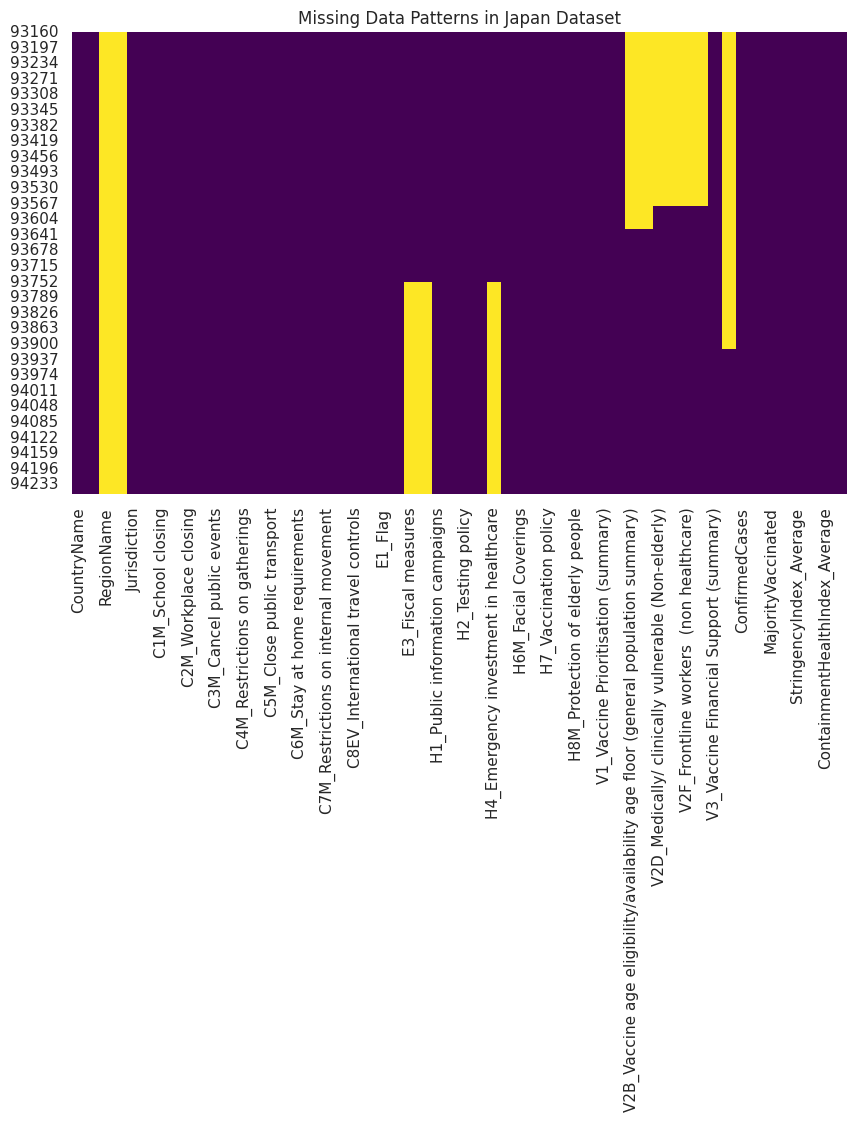

In [65]:
# Heatmap showing missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_japan.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Patterns in Japan Dataset')
plt.show()

Here's an overview of the missing values in the dataset:

Columns such as ConfirmedCases, ConfirmedDeaths, and policy indices (StringencyIndex, Investment in vaccines, Facial Coverings, etc.) have 0% missing values, ensuring reliability for core analysis.

RegionName/RegionCode is 100% missing and it is normal since this is national-level data.

Other notable variables with significant missing data include Flag, Mandatory Vaccination, and Fiscal Measures.

In [68]:
# Drop unnecessary columns with 100% missing data
cols_to_drop = [
    'RegionName', 'RegionCode'
]
df_clean = df_japan.drop(columns=cols_to_drop)

# Save the cleaned data for use in a new ipynb
df_clean.to_csv('cleaned_japan_data.csv', index=False)